In [63]:
import numpy as np
import matplotlib.pyplot as plt

import decimal


# decimal.getcontext().prec = 5

In [64]:
def bolts(A2, A3, x, x_o):
    A1 = 303
    a = []
    y = []
    for i in A2:
        for k in x_o:
            for j in A3:
                b = A1 + (i - A1)/(1+np.exp((x-k)/j))
                a.append(b)
                y.append([i , j, k])
    return(np.array(a), np.array(y))

In [65]:
def bolts_int(A2, A3, x, x_o):
    A1 = 303
    b = A1 + (A2-A1)/(1+np.exp((x-x_o)/A3))
    return b

In [66]:
A2 = 538.0080602192687
A3 = 0.5503972556122777
x_o = 28.00498305421301


In [67]:
A2 = np.linspace(303, 773, 50)
# A3 = np.linspace(0.1, 1, 5)
# x_o = np.linspace(1, 55, 50)
x = np.linspace(0, 55, 1000)

# mol = np.linspace(.1, 0.3, 10)

In [71]:
A2

array([303.        , 312.59183673, 322.18367347, 331.7755102 ,
       341.36734694, 350.95918367, 360.55102041, 370.14285714,
       379.73469388, 389.32653061, 398.91836735, 408.51020408,
       418.10204082, 427.69387755, 437.28571429, 446.87755102,
       456.46938776, 466.06122449, 475.65306122, 485.24489796,
       494.83673469, 504.42857143, 514.02040816, 523.6122449 ,
       533.20408163, 542.79591837, 552.3877551 , 561.97959184,
       571.57142857, 581.16326531, 590.75510204, 600.34693878,
       609.93877551, 619.53061224, 629.12244898, 638.71428571,
       648.30612245, 657.89795918, 667.48979592, 677.08163265,
       686.67346939, 696.26530612, 705.85714286, 715.44897959,
       725.04081633, 734.63265306, 744.2244898 , 753.81632653,
       763.40816327, 773.        ])

In [ ]:
b

In [ ]:
a2 = bolts_int(A2, A3, x, x_o)

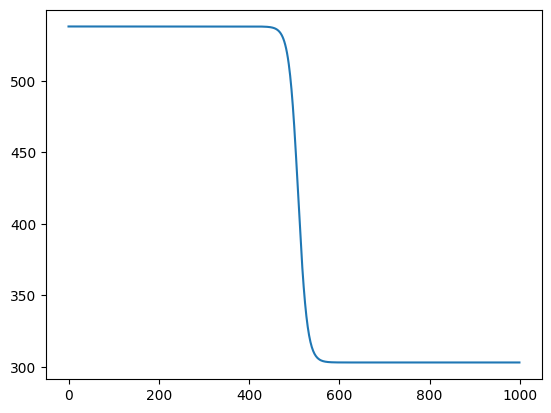

In [ ]:
plt.plot(a2)

In [ ]:
np.save('EXP_TEST', a2)

In [ ]:
e1, e2 = a2

In [ ]:
e1 = np.array(e1)

In [ ]:
e2 = np.array(e2)

In [ ]:
e1

array([[303.        , 303.        , 303.        , ..., 303.        ,
        303.        , 303.        ],
       [303.        , 303.        , 303.        , ..., 303.        ,
        303.        , 303.        ],
       [303.        , 303.        , 303.        , ..., 303.        ,
        303.        , 303.        ],
       ...,
       [773.        , 773.        , 773.        , ..., 613.79031201,
        576.93540516, 538.        ],
       [773.        , 773.        , 773.        , ..., 592.75299017,
        565.75846849, 538.        ],
       [773.        , 773.        , 773.        , ..., 580.74638219,
        559.55297386, 538.        ]])

In [ ]:
e2

array([[3.03e+02, 1.00e-01, 1.00e+00],
       [3.03e+02, 3.25e-01, 1.00e+00],
       [3.03e+02, 5.50e-01, 1.00e+00],
       ...,
       [7.73e+02, 5.50e-01, 5.50e+01],
       [7.73e+02, 7.75e-01, 5.50e+01],
       [7.73e+02, 1.00e+00, 5.50e+01]])

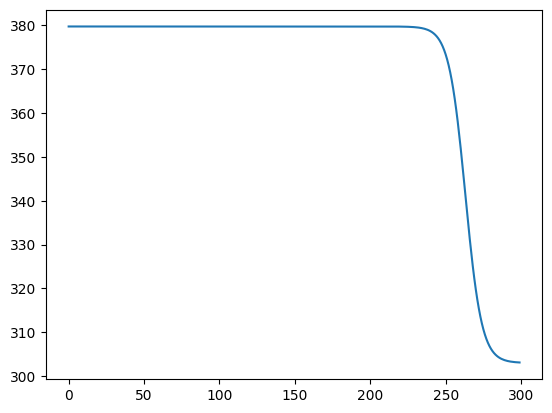

In [ ]:
plt.plot(e1[2219])

In [ ]:
from scipy import signal

# r1 = []
# for i in e1:
#     downsampled =  signal.resample(i, 1000)
#     r1.append(downsampled)

# r1 = np.array(r1).astype(np.half)

In [ ]:
e1.shape

(12500, 300)

In [ ]:
np.save('final_profile_300', e1)

In [ ]:
np.save('final_param_300', e2)

In [ ]:
test = bolts_int(7.73e+02, 1.00e-01, x, 1.00e+00)

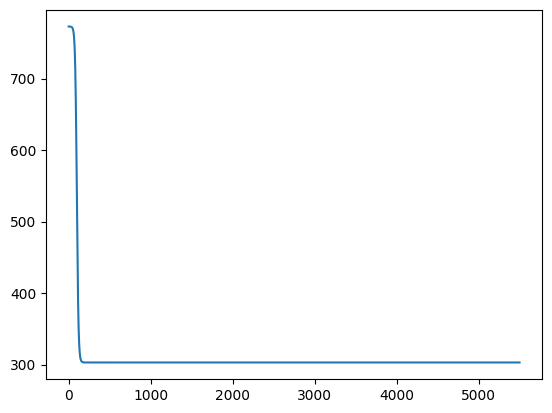

In [ ]:
plt.plot(test)